#**Data Analysis - Unsupervised Approach**
-1.495899 : A
0.682595 : N
-0.043570 : E
1.408759 : O
-0.769734 : C


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, Input
from tensorflow.keras import Model

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Read data from CSV file
df = pd.read_csv("/content/drive/MyDrive/Student_Survey_Data__Adjusted_.csv")
df_actual = df

# Ensure that the data is properly read
print(df.head())



     Age  Gender          Edu_Background  Rating Dominant_Personality_Trait  \
0  15-20    Male       Engineering Major      10                          A   
1    >24  Female           Medical Major       2                          N   
2  15-20    Male  Computer Science Major       3                          E   
3  15-20    Male          Business Major       6                          E   
4    >24    Male       Engineering Major       1                          O   

   Authority_Aspect_Freq  Consistency_Aspect_Freq  Social_Proof_Aspect_Freq  \
0                      6                        5                         3   
1                      7                        4                         0   
2                      0                        9                         4   
3                      5                        2                        10   
4                      3                       10                         9   

   Reciprocity_Aspect_Freq  Liking_Aspect_Freq  ..

#**Data Visualization:**

In [ ]:

# # Extract relevant columns
# cialdini_columns = [
#     'Authority_Aspect_Freq', 'Consistency_Aspect_Freq', 'Social_Proof_Aspect_Freq',
#     'Reciprocity_Aspect_Freq', 'Liking_Aspect_Freq', 'Scarcity_Aspect_Freq'
# ]
# personality_column = 'Dominant_Personality_Trait'

# # Calculate average frequency of each technique for each personality type
# average_frequencies = df.groupby(personality_column)[cialdini_columns].mean()

# # Display the average frequencies
# print("Average Frequencies of Cialdini Techniques by Personality Type")
# print(average_frequencies)

# # Plot the average frequencies
# average_frequencies.plot(kind='bar', figsize=(12, 6))
# plt.title('Average Frequency of Cialdini Techniques by Personality Type')
# plt.ylabel('Average Frequency')
# plt.xlabel('Personality Type')
# plt.legend(title='Cialdini Technique')
# plt.show()

# # Calculate correlations between personality traits and Cialdini techniques
# # Convert personality traits to numerical values for correlation
# personality_numeric = df[personality_column].astype('category').cat.codes
# correlations = pd.DataFrame(index=cialdini_columns)

# for column in cialdini_columns:
#     correlations[column] = df[column].corr(personality_numeric, method='spearman')

# # Display the correlations
# print("Correlations between Personality Traits and Cialdini Techniques")
# print(correlations)

# # Plot the correlations
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation between Personality Traits and Cialdini Techniques')
# plt.show()



#**Data Cleaning and Preprocessing:**

In [ ]:
# Handle Missing Values: Removing rows with missing values
df = df.dropna()

# Standardize Column Names: Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert Data Types: Convert categorical columns to category type
categorical_columns = ['age' , 'gender', 'edu_background', 'dominant_personality_trait']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert rating column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


# Handle Categorical Data: Using Label Encoding for simplicity
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Function to check and convert columns to float
def convert_columns_to_float(df):
    for column in df.columns:
        # Check the data type of the column
        column_type = df[column].dtype
        print(f"Data type of column '{column}': {column_type}")

        # Attempt to convert the column to float using astype(float)
        try:
            df[column] = df[column].astype(float)
            print(f"Column '{column}' successfully converted to float.")
        except ValueError:
            print(f"Column '{column}' could not be converted to float and was skipped.")

    return df

df_copy= df.copy(deep = False)

# Scale Numerical Features: Using StandardScaler for standardization
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# Convert columns to float
df = convert_columns_to_float(df)

# Display cleaned dataframe information
print("\nCleaned DataFrame Info:")
df.head(20)



Data type of column 'age': float64
Column 'age' successfully converted to float.
Data type of column 'gender': float64
Column 'gender' successfully converted to float.
Data type of column 'edu_background': float64
Column 'edu_background' successfully converted to float.
Data type of column 'rating': float64
Column 'rating' successfully converted to float.
Data type of column 'dominant_personality_trait': float64
Column 'dominant_personality_trait' successfully converted to float.
Data type of column 'authority_aspect_freq': float64
Column 'authority_aspect_freq' successfully converted to float.
Data type of column 'consistency_aspect_freq': float64
Column 'consistency_aspect_freq' successfully converted to float.
Data type of column 'social_proof_aspect_freq': float64
Column 'social_proof_aspect_freq' successfully converted to float.
Data type of column 'reciprocity_aspect_freq': float64
Column 'reciprocity_aspect_freq' successfully converted to float.
Data type of column 'liking_aspec

,age,gender,edu_background,rating,dominant_personality_trait,authority_aspect_freq,consistency_aspect_freq,social_proof_aspect_freq,reciprocity_aspect_freq,liking_aspect_freq,...,demotivation_negativefeedback,demotivation_irrelevantcontent,demotivation_complexnavigation,demotivation_spam-likeappearance,demotivation_lackofcontactinformation,demotivation_nosocialmediapresence,demotivation_inconsistentinfo,demotivation_neverheardrecommendationsaboutit,demotivation_suspicious,demotivation_aggressivecallstoaction
0,-1.126415,1.199593,0.702015,1.704627,-1.495899,0.256139,0.148116,-0.720669,-1.665218,-0.599683,...,-1.175139,-0.717741,1.083473,0.886405,-0.941697,-0.922958,-1.250641,0.941697,1.061913,-0.980196
1,1.270213,-0.833616,1.397080,-1.209265,0.682595,0.588788,-0.167025,-1.681561,1.476703,0.378061,...,0.850963,1.393261,-0.922958,-1.128152,-0.941697,1.083473,-1.250641,0.941697,-0.941697,-0.980196
2,-1.126415,1.199593,0.006951,-0.845029,-0.043570,-1.739751,1.408680,-0.400372,1.476703,-0.925597,...,-1.175139,1.393261,-0.922958,0.886405,1.061913,-0.922958,0.799590,0.941697,1.061913,1.020204
3,-1.126415,1.199593,-0.688114,0.247681,-0.043570,-0.076509,-0.797306,1.521413,0.848319,1.029890,...,0.850963,-0.717741,-0.922958,-1.128152,-0.941697,1.083473,-1.250641,-1.061913,-0.941697,1.020204
4,1.270213,1.199593,0.702015,-1.573502,1.408759,-0.741806,1.723820,1.201115,0.848319,-0.273768,...,0.850963,1.393261,1.083473,0.886405,-0.941697,1.083473,-1.250641,-1.061913,1.061913,-0.980196
5,0.071899,1.199593,1.397080,0.247681,-0.043570,0.588788,-0.167025,0.880818,-1.351026,1.355804,...,-1.175139,-0.717741,-0.922958,0.886405,-0.941697,-0.922958,0.799590,-1.061913,-0.941697,-0.980196
6,-1.126415,-0.833616,-1.383179,0.611917,-1.495899,-0.409158,1.408680,-0.080074,1.162511,-1.251512,...,0.850963,-0.717741,1.083473,0.886405,1.061913,1.083473,0.799590,0.941697,1.061913,1.020204
7,0.071899,1.199593,-1.383179,0.976154,-0.043570,-0.409158,-1.112447,1.201115,1.162511,-0.925597,...,0.850963,-0.717741,-0.922958,0.886405,-0.941697,1.083473,0.799590,0.941697,1.061913,-0.980196
8,1.270213,1.199593,0.702015,-1.209265,-1.495899,-1.739751,-1.427588,0.240223,-0.722642,0.703975,...,0.850963,-0.717741,1.083473,0.886405,-0.941697,-0.922958,-1.250641,0.941697,1.061913,-0.980196
9,0.071899,-0.833616,1.397080,1.704627,0.682595,1.254085,1.093539,-1.681561,-0.408450,1.355804,...,0.850963,-0.717741,-0.922958,0.886405,1.061913,1.083473,0.799590,-1.061913,1.061913,1.020204


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            100 non-null    float64
 1   gender                                         100 non-null    float64
 2   edu_background                                 100 non-null    float64
 3   rating                                         100 non-null    float64
 4   dominant_personality_trait                     100 non-null    float64
 5   authority_aspect_freq                          100 non-null    float64
 6   consistency_aspect_freq                        100 non-null    float64
 7   social_proof_aspect_freq                       100 non-null    float64
 8   reciprocity_aspect_freq                        100 non-null    float64
 9   liking_aspect_freq                             100 non-

#**Correlation Analysis:**


In [ ]:
# print(df['liking_aspect_freq'].dtype)

#**Initial Exploration:**

Descriptive Statistics:

                age        gender  edu_background        rating  \
count  1.000000e+02  1.000000e+02    1.000000e+02  1.000000e+02   
mean   3.108624e-17  1.121325e-16   -2.615963e-17 -1.376677e-16   
std    1.005038e+00  1.005038e+00    1.005038e+00  1.005038e+00   
min   -1.126415e+00 -8.336158e-01   -1.383179e+00 -1.573502e+00   
25%   -1.126415e+00 -8.336158e-01   -6.881142e-01 -8.450287e-01   
50%    7.189884e-02 -8.336158e-01    6.950648e-03 -1.165557e-01   
75%    1.270213e+00  1.199593e+00    7.020155e-01  7.029764e-01   
max    1.270213e+00  1.199593e+00    1.397080e+00  1.704627e+00   

       dominant_personality_trait  authority_aspect_freq  \
count                1.000000e+02           1.000000e+02   
mean                -8.881784e-18          -1.559863e-16   
std                  1.005038e+00           1.005038e+00   
min                 -1.495899e+00          -1.739751e+00   
25%                 -7.697344e-01          -7.418060e-01   
50%        

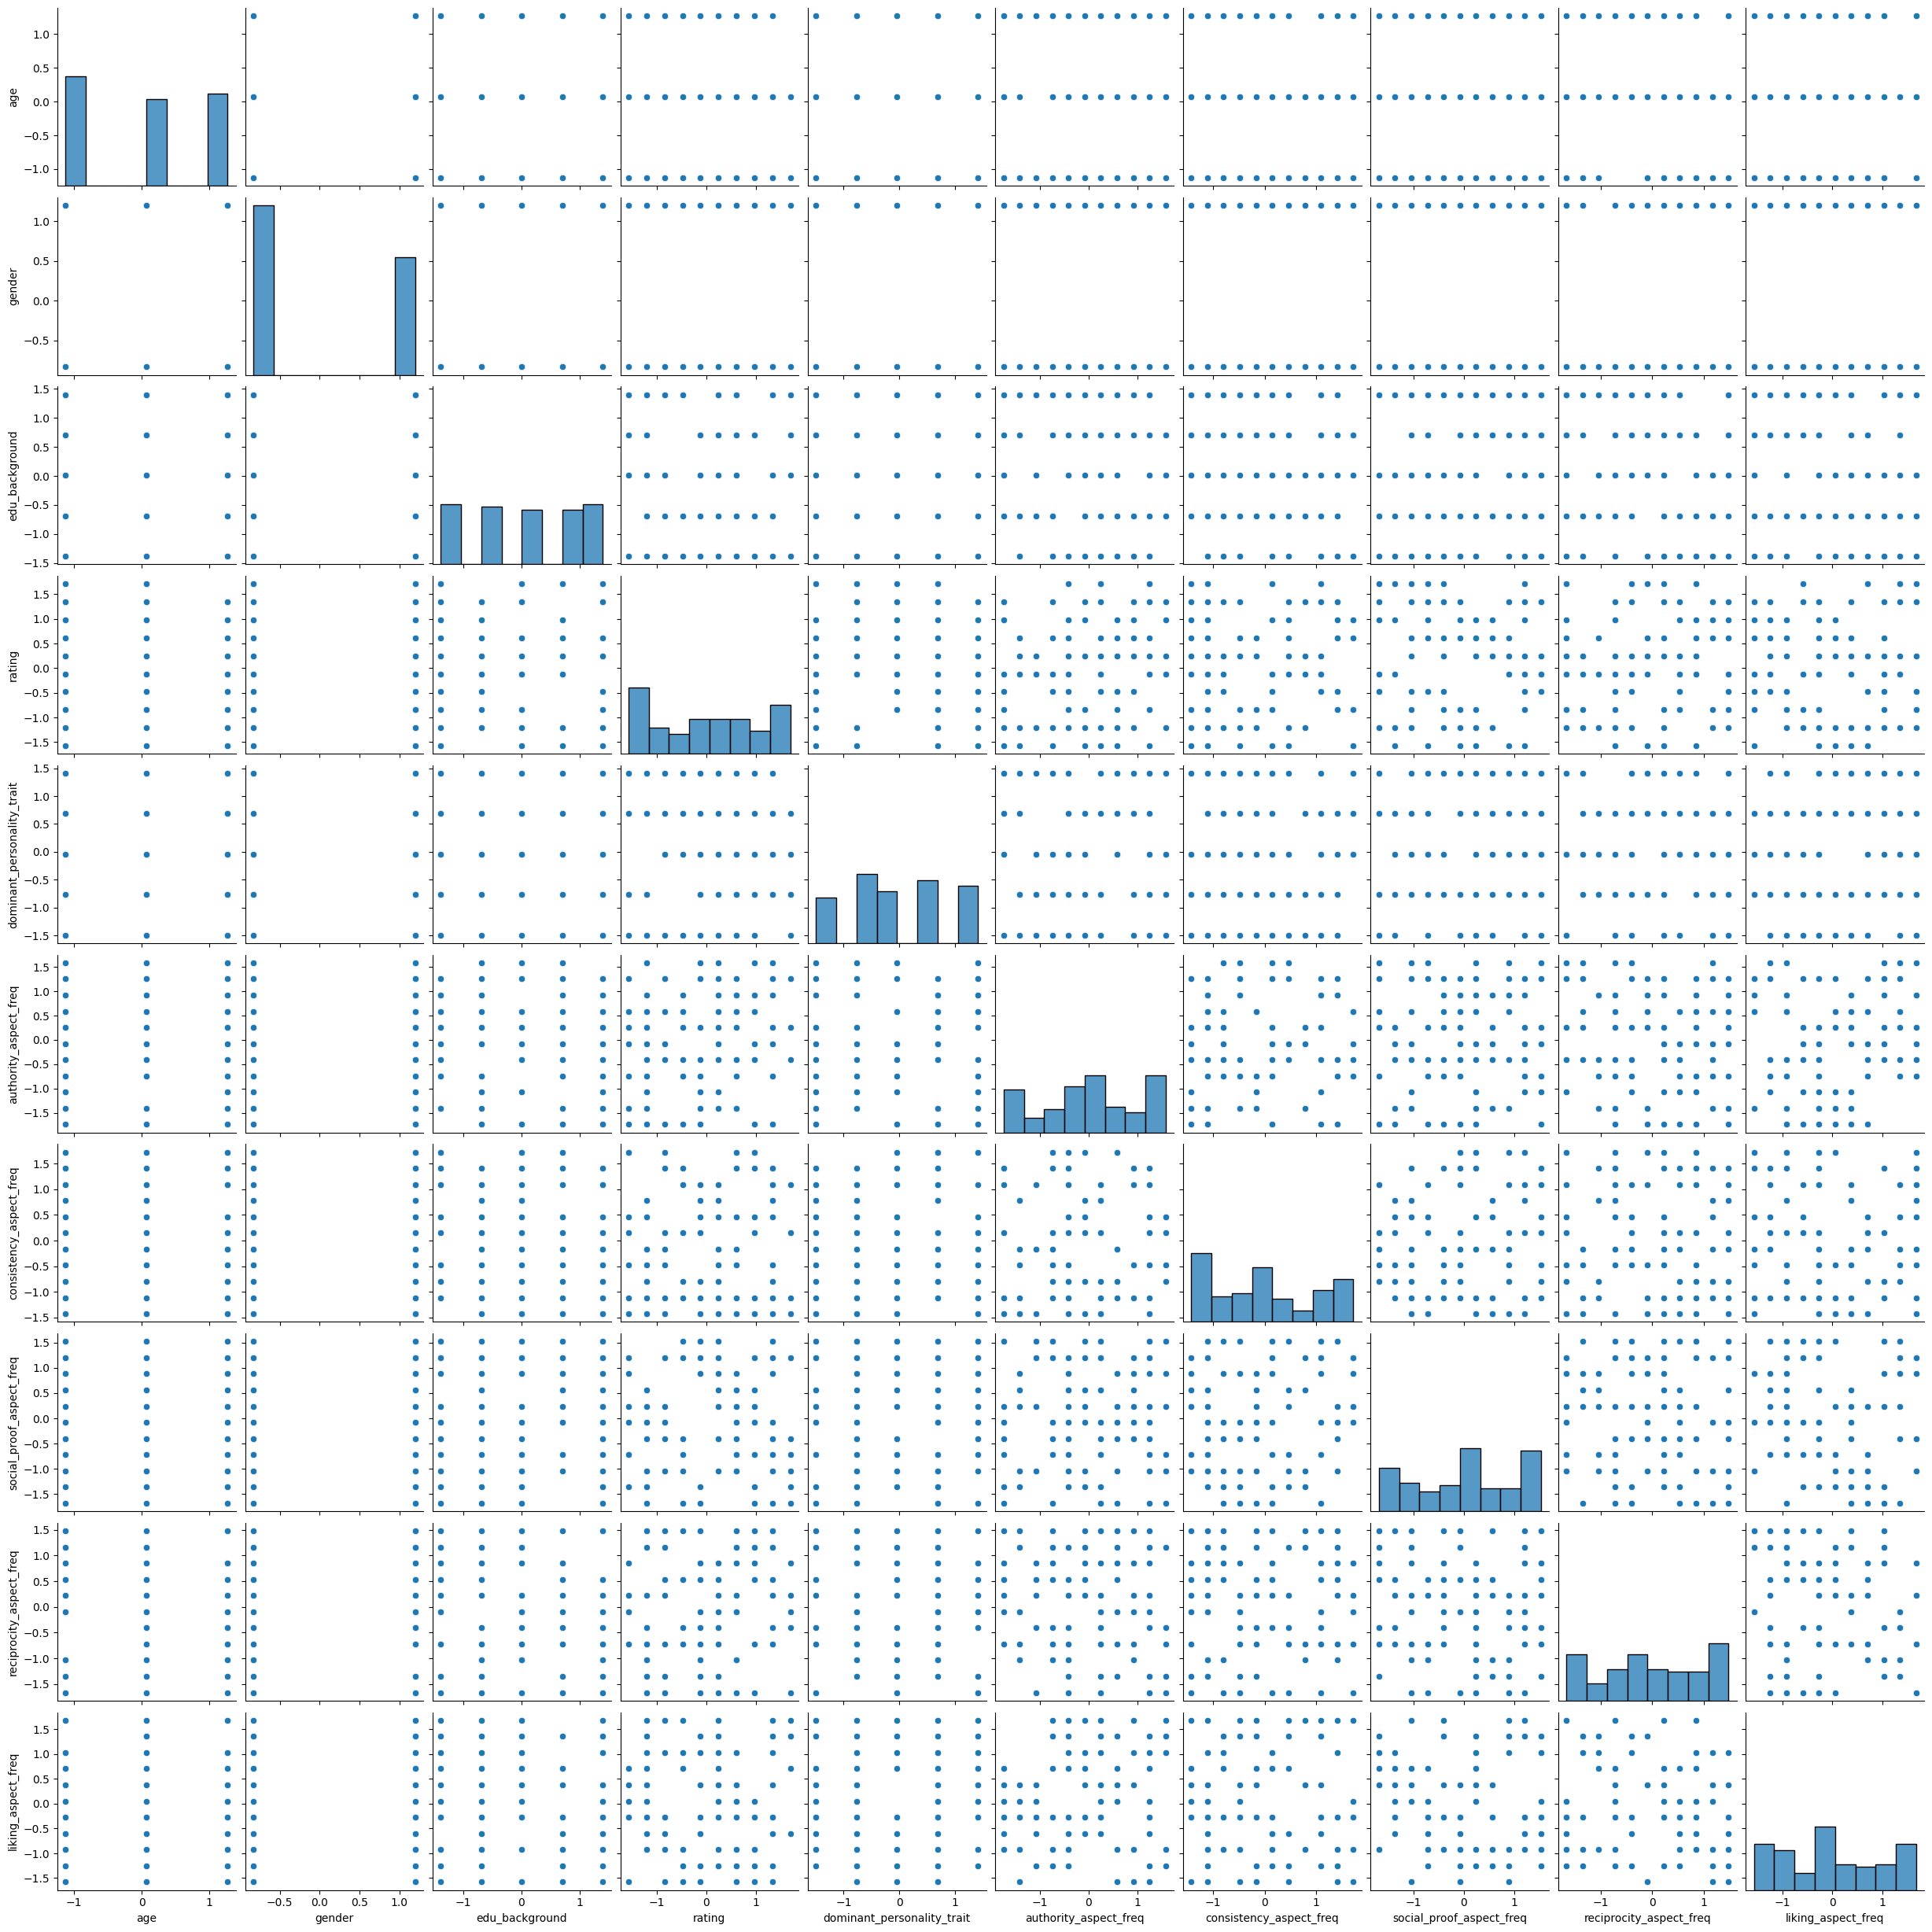

In [ ]:

# Descriptive Statistics
print("Descriptive Statistics:\n")
print(df.describe())

# Function to calculate mode for each column
def calculate_mode(df):
    modes = {}
    for column in df.columns:
        modes[column] = df[column].mode()[0]
    return modes

# Calculate and display mode
modes = calculate_mode(df)
print("\nModes:\n")
for column, mode in modes.items():
    print(f"{column}: {mode}")

# Reduce the number of variables for pairplot (selecting the first 10 numerical columns)
selected_columns = df.select_dtypes(include=['float64', 'int64']).columns[:10]
df_subset = df[selected_columns]

# Pairplot to visualize distributions and relationships between pairs of selected variables
sns.pairplot(df_subset)
plt.show()


# **Dimensionality Reduction:**

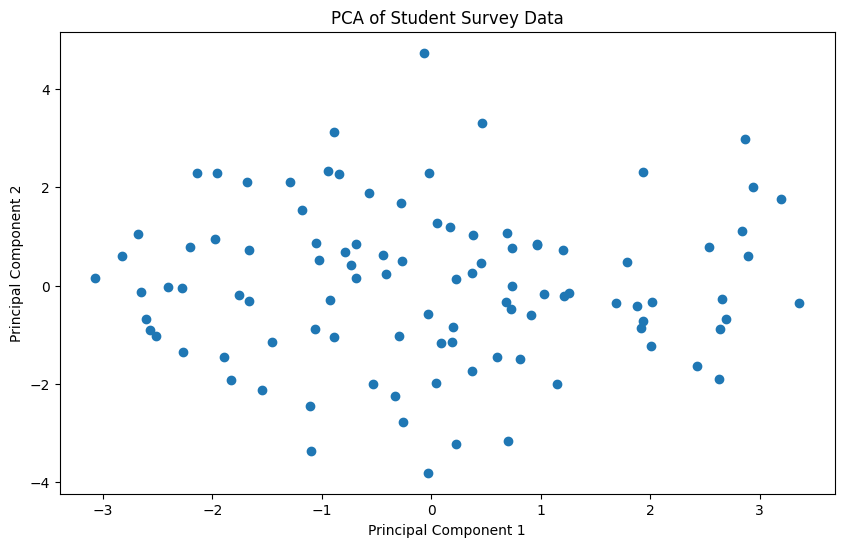

In [ ]:
df = df.drop(columns = ['subject_effective_persuasion_feature','content_effective_persuasion_feature','website_design_persuasion_features','popularity_of_website'])
df_copy = df_copy.drop(columns = ['subject_effective_persuasion_feature','content_effective_persuasion_feature','website_design_persuasion_features','popularity_of_website'])


# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.title('PCA of Student Survey Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#**Cluster Analysis Model:**  

### Kmeans

In [ ]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)
silhouette_kmeans = silhouette_score(pca_features, kmeans_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
edu_background,0
rating,0
dominant_personality_trait,0
authority_aspect_freq,0
consistency_aspect_freq,0
social_proof_aspect_freq,0
reciprocity_aspect_freq,0
liking_aspect_freq,0


In [ ]:
print('labels', kmeans_labels)

labels [0 2 2 0 2 0 2 2 2 1 1 1 0 0 0 2 1 0 0 1 2 1 1 2 0 1 1 1 2 0 0 1 2 2 2 2 2
 1 2 0 0 2 1 2 0 0 2 0 2 1 0 1 0 1 2 2 2 2 1 1 0 0 2 0 1 0 0 0 2 0 0 1 1 1
 2 0 0 2 1 1 1 0 2 2 0 1 0 1 1 2 2 0 0 0 2 2 0 0 2 1]


### Aggoloromative

In [ ]:
# Clustering using Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(pca_features)
silhouette_agg = silhouette_score(pca_features, agg_labels)

### DBSCAN

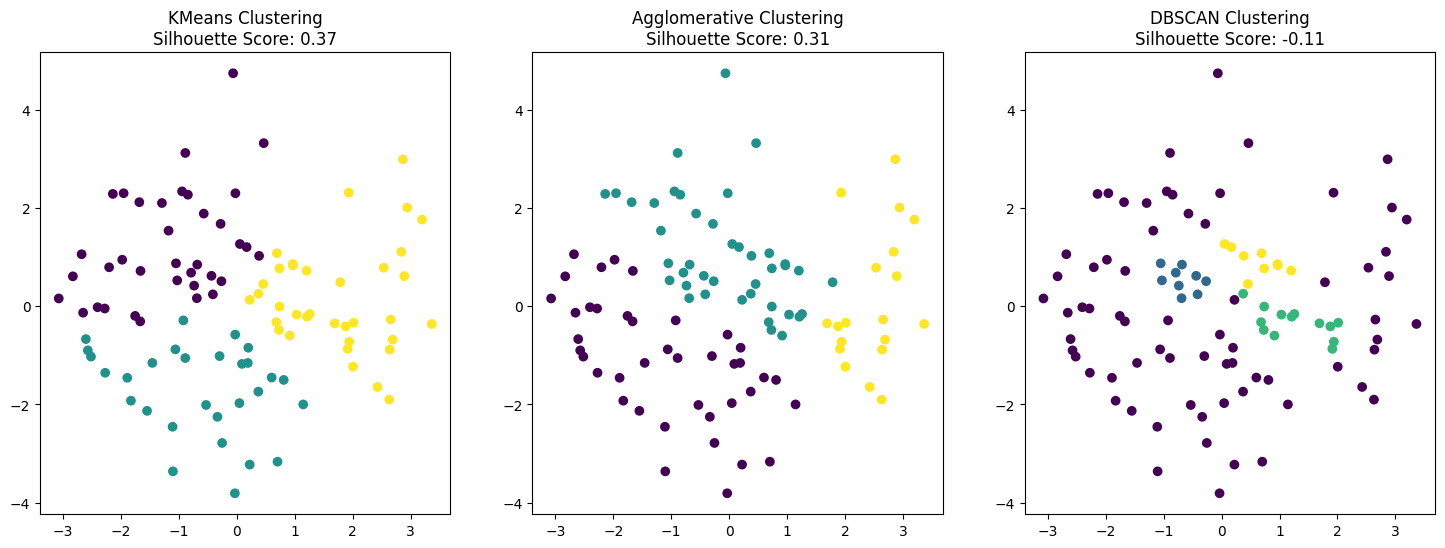

In [ ]:
# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_features)

# Handling case where all points are marked as noise (-1)
silhouette_dbscan = silhouette_score(pca_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Plot clustering results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels)
axs[0].set_title(f'KMeans Clustering\nSilhouette Score: {silhouette_kmeans:.2f}')

axs[1].scatter(pca_features[:, 0], pca_features[:, 1], c=agg_labels)
axs[1].set_title(f'Agglomerative Clustering\nSilhouette Score: {silhouette_agg:.2f}')

axs[2].scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels)
axs[2].set_title(f'DBSCAN Clustering\nSilhouette Score: {silhouette_dbscan:.2f}')

plt.show()

### Best clustering Approach:

In [ ]:
best_clustering_approach = 'KMeans' if silhouette_kmeans > silhouette_agg and silhouette_kmeans > silhouette_dbscan else 'Agglomerative Clustering' if silhouette_agg > silhouette_dbscan else 'DBSCAN'
print(f'Best Clustering Approach: {best_clustering_approach}')

Best Clustering Approach: KMeans


#**Clustered Output Formation:**

In [ ]:
df_copy['kmeans_labels'] = kmeans_labels

df_copy.head()

def get_most_correlated_columns(df, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Mask the diagonal and lower triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    corr_matrix_masked = corr_matrix.where(~mask)

    # Find the pairs of columns with correlation greater than the threshold
    most_correlated = corr_matrix_masked.stack().reset_index()
    most_correlated.columns = ['Column1', 'Column2', 'Correlation']

    # Filter the pairs by the correlation threshold
    most_correlated = most_correlated[most_correlated['Correlation'] > threshold]

    # Sort the pairs by correlation value in descending order
    most_correlated = most_correlated.sort_values(by='Correlation', ascending=False)

    return most_correlated



In [ ]:
cluster_0 = df_copy[df_copy['kmeans_labels'] == 0]
cluster_1 = df_copy[df_copy['kmeans_labels'] == 1]
cluster_2 = df_copy[df_copy['kmeans_labels'] == 2]

In [ ]:
# Example usage
most_correlated_columns = get_most_correlated_columns(cluster_2, threshold=0.5)

if not most_correlated_columns.empty:
    print(most_correlated_columns)
else:
    print("No columns with correlation above the threshold.")



                                   Column1                 Column2  \
572  demotivation_lackofsecurityindicators        design_feature_1   
628          demotivation_negativefeedback  demotivation_vagueinfo   

     Correlation  
572     0.578859  
628     0.502386  


In [ ]:
cluster_0.describe()

,age,gender,edu_background,rating,dominant_personality_trait,authority_aspect_freq,consistency_aspect_freq,social_proof_aspect_freq,reciprocity_aspect_freq,liking_aspect_freq,...,demotivation_irrelevantcontent,demotivation_complexnavigation,demotivation_spam-likeappearance,demotivation_lackofcontactinformation,demotivation_nosocialmediapresence,demotivation_inconsistentinfo,demotivation_neverheardrecommendationsaboutit,demotivation_suspicious,demotivation_aggressivecallstoaction,kmeans_labels
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,0.888889,0.583333,2.277778,5.416667,1.888889,4.972222,4.722222,7.083333,4.277778,4.694444,...,0.194444,0.305556,0.527778,0.416667,0.527778,0.500000,0.611111,0.388889,0.666667,0.0
std,0.820375,0.500000,1.466017,2.600824,1.469262,2.990328,3.085553,2.370955,3.221456,3.078213,...,0.401386,0.467177,0.506309,0.500000,0.506309,0.507093,0.494413,0.494413,0.478091,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,1.000000,3.750000,0.750000,3.000000,2.000000,5.750000,1.750000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,3.000000,6.000000,2.000000,5.000000,5.000000,7.000000,4.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.0
75%,2.000000,1.000000,3.000000,7.000000,3.000000,7.000000,8.000000,9.000000,7.000000,7.250000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,2.000000,1.000000,4.000000,10.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 9 to 99
Data columns (total 46 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   age                                            29 non-null     int64
 1   gender                                         29 non-null     int64
 2   edu_background                                 29 non-null     int64
 3   rating                                         29 non-null     int64
 4   dominant_personality_trait                     29 non-null     int64
 5   authority_aspect_freq                          29 non-null     int64
 6   consistency_aspect_freq                        29 non-null     int64
 7   social_proof_aspect_freq                       29 non-null     int64
 8   reciprocity_aspect_freq                        29 non-null     int64
 9   liking_aspect_freq                             29 non-null     int64
 10  scarcity_

<Axes: >

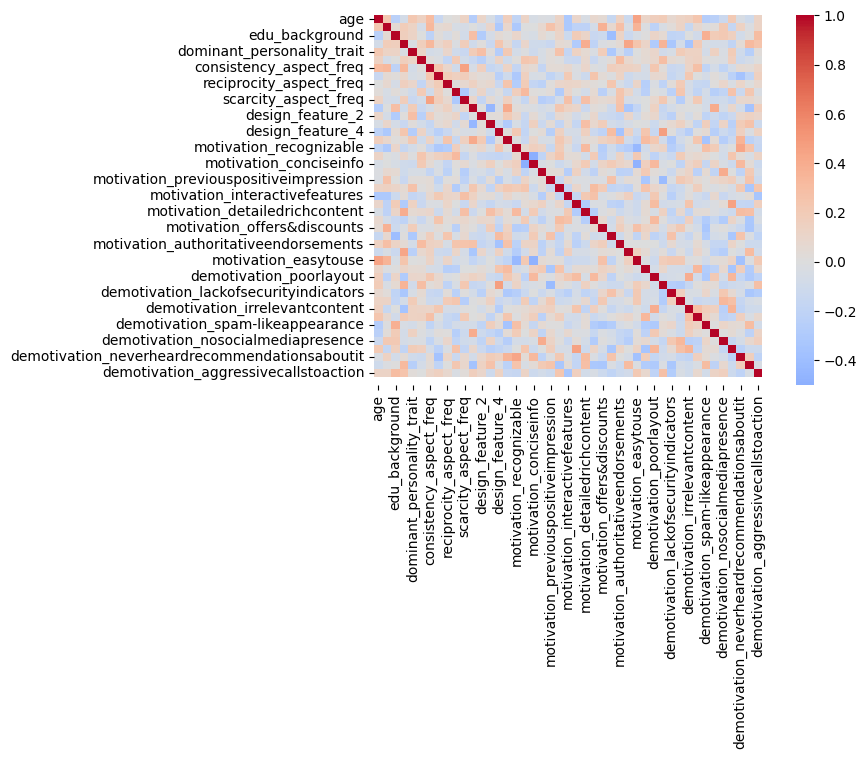

In [ ]:
sns.heatmap(cluster_0.corr(), cmap='coolwarm', center=0)


<Axes: >

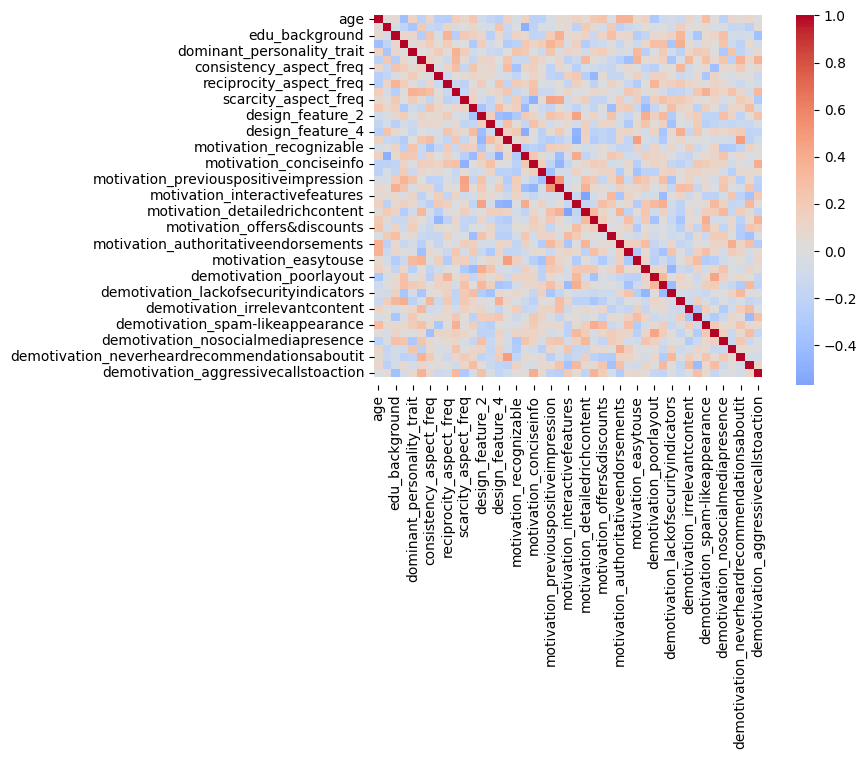

In [ ]:
sns.heatmap(cluster_1.corr(), cmap='coolwarm', center=0)


<Axes: >

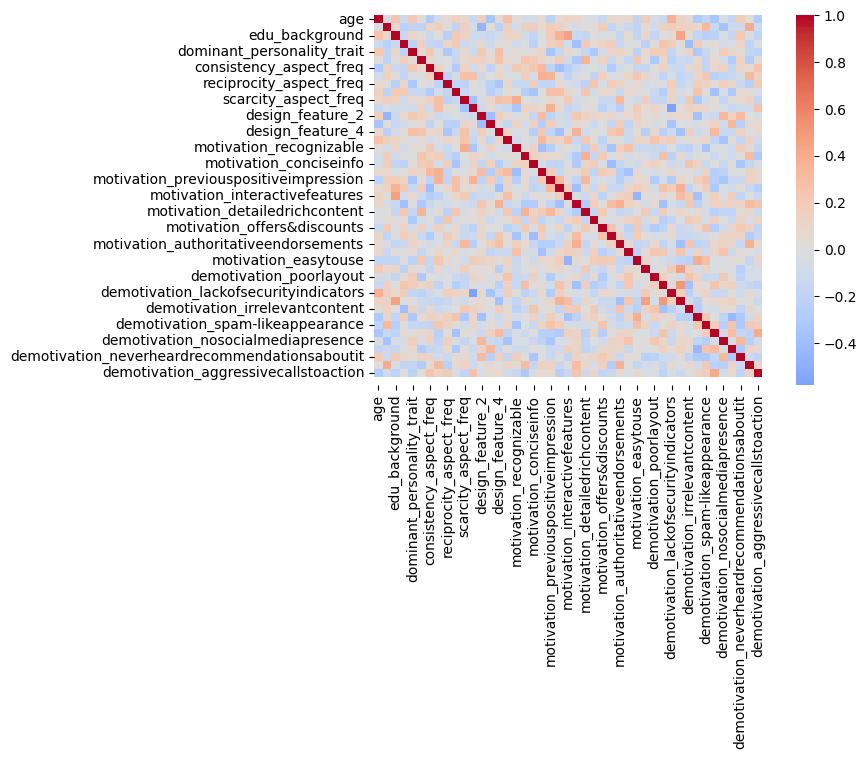

In [ ]:
sns.heatmap(cluster_2.corr(), cmap='coolwarm', center=0)


In [ ]:
# Overall level summary
df_profile_overall = df_copy.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_profile_overall['Overall Dataset'] = df_profile_overall[['mean']]
df_profile_overall = df_profile_overall[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary = df_copy.groupby('kmeans_labels').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "mean"]
df_cluster_summary = df_cluster_summary.set_index('column')

# join into single summary dataset
df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index


In [ ]:
df_profile

,metric,0,1,2,Overall Dataset
column,,,,,
age,mean,0.888889,1.137931,0.828571,0.94
gender,mean,0.583333,0.172414,0.428571,0.41
edu_background,mean,2.277778,1.965517,1.714286,1.99
rating,mean,5.416667,4.310345,6.057143,5.32
dominant_personality_trait,mean,1.888889,2.172414,2.142857,2.06
authority_aspect_freq,mean,4.972222,6.000000,4.857143,5.23
consistency_aspect_freq,mean,4.722222,4.137931,4.657143,4.53
social_proof_aspect_freq,mean,7.083333,3.758621,4.600000,5.25
reciprocity_aspect_freq,mean,4.277778,4.275862,7.200000,5.30


In [ ]:
df_copy.head()

,age,gender,edu_background,rating,dominant_personality_trait,authority_aspect_freq,consistency_aspect_freq,social_proof_aspect_freq,reciprocity_aspect_freq,liking_aspect_freq,...,demotivation_irrelevantcontent,demotivation_complexnavigation,demotivation_spam-likeappearance,demotivation_lackofcontactinformation,demotivation_nosocialmediapresence,demotivation_inconsistentinfo,demotivation_neverheardrecommendationsaboutit,demotivation_suspicious,demotivation_aggressivecallstoaction,kmeans_labels
0,0,1,3,10,0,6,5,3,0,3,...,0,1,1,0,0,0,1,1,0,0
1,2,0,4,2,3,7,4,0,10,6,...,1,0,0,0,1,0,1,0,0,2
2,0,1,2,3,2,0,9,4,10,2,...,1,0,1,1,0,1,1,1,1,2
3,0,1,1,6,2,5,2,10,8,8,...,0,0,0,0,1,0,0,0,1,0
4,2,1,3,1,4,3,10,9,8,4,...,1,1,1,0,1,0,0,1,0,2


In [ ]:
df_profile.head()

,metric,0,1,2,Overall Dataset
column,,,,,
age,mean,0.888889,1.137931,0.828571,0.94
gender,mean,0.583333,0.172414,0.428571,0.41
edu_background,mean,2.277778,1.965517,1.714286,1.99
rating,mean,5.416667,4.310345,6.057143,5.32
dominant_personality_trait,mean,1.888889,2.172414,2.142857,2.06


In [ ]:

def approximate_cluster_values(df_profile):
    # Dictionary to store the approximated values for each cluster
    cluster_approximations = {}

    # Loop through each cluster column, excluding 'Overall Dataset'
    for cluster in df_profile.columns[df_profile.columns != 'Overall Dataset']:
        # Filter out non-numeric values (ensure only numeric data is processed)
        numeric_data = pd.to_numeric(df_profile[cluster], errors='coerce')

        # Drop NaN values that resulted from non-numeric entries
        numeric_data = numeric_data.dropna()

        # Round the numeric values to the nearest whole number and convert to integers
        approximated_values = numeric_data.round().astype(int).values

        # Store the approximated values in the dictionary
        cluster_approximations[cluster] = approximated_values

    return cluster_approximations

# Example usage with the df_profile DataFrame
approximated_clusters = approximate_cluster_values(df_profile)

# Print the approximated values for each cluster
for cluster, values in approximated_clusters.items():
    print(f"Cluster {cluster} approximated values: {values}")


Cluster metric approximated values: []
Cluster 0 approximated values: [1 1 2 5 2 5 5 7 4 5 5 3 2 3 3 3 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 1]
Cluster 1 approximated values: [1 0 2 4 2 6 4 4 4 6 4 3 2 3 3 3 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0
 0 0 0 0 1 0 0 1]
Cluster 2 approximated values: [1 0 2 6 2 5 5 5 7 4 6 3 3 3 4 3 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 0]


In [ ]:

def approximate_cluster_values(df_profile):
    # Dictionary to store the approximated values for each cluster
    cluster_approximations = {}

    # Loop through each cluster column, excluding 'Overall Dataset'
    for cluster in df_profile.columns[df_profile.columns != 'Overall Dataset']:
        # Filter out non-numeric values (ensure only numeric data is processed)
        numeric_data = pd.to_numeric(df_profile[cluster], errors='coerce')

        # Drop NaN values that resulted from non-numeric entries
        numeric_data = numeric_data.dropna()

        # Round the numeric values to the nearest whole number and convert to integers
        approximated_values = numeric_data.round().astype(int)

        # Store the approximated values along with their index in the dictionary
        cluster_approximations[cluster] = approximated_values

    return cluster_approximations

# Example usage with the df_profile DataFrame
approximated_clusters = approximate_cluster_values(df_profile)

# Print the approximated values for each cluster along with their index (column names)
for cluster, values in approximated_clusters.items():
    print(f"Cluster {cluster} approximated values:")
    for index, value in values.items():
        print(f"  {index}: {value}")


Cluster metric approximated values:
Cluster 0 approximated values:
  age: 1
  gender: 1
  edu_background: 2
  rating: 5
  dominant_personality_trait: 2
  authority_aspect_freq: 5
  consistency_aspect_freq: 5
  social_proof_aspect_freq: 7
  reciprocity_aspect_freq: 4
  liking_aspect_freq: 5
  scarcity_aspect_freq: 5
  design_feature_1: 3
  design_feature_2: 2
  design_feature_3: 3
  design_feature_4: 3
  url_awareness: 3
  motivation_recognizable: 1
  motivation_professional: 1
  motivation_conciseinfo: 0
  motivation_securityindicators: 0
  motivation_previouspositiveimpression: 0
  motivation_personalinterest: 0
  motivation_interactivefeatures: 1
  motivation_callstoaction: 1
  motivation_detailedrichcontent: 1
  motivation_previousrecommendation: 1
  motivation_offers&discounts: 0
  motivation_socialmedia: 0
  motivation_authoritativeendorsements: 0
  motivation_goodreputation: 0
  motivation_easytouse: 1
  demotivation_unfamiliarsource: 0
  demotivation_poorlayout: 1
  demotivation

#*******************************************************************************

#**Cluster Prediction Model - Supervised Approach**


#**Comparison Between: Random Forest, Gradient Boosting Machines (GBM), k-Nearest Neighbors (k-NN)**

In [ ]:
# Step 2: Preprocess the Data
# Assuming the last column is the 'kmeans_labels' and others are the features
X = df_copy.drop('kmeans_labels', axis=1)  # Features
y = df_copy['kmeans_labels']  # Labels

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Models
# 3.1 Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# 3.2 Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_accuracy = accuracy_score(y_test, gbm_predictions)

# 3.3 k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune the 'k' value (e.g., n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Step 4: Compare Accuracies
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Gradient Boosting Machines (GBM) Accuracy: {gbm_accuracy * 100:.2f}%")
print(f"k-Nearest Neighbors (k-NN) Accuracy: {knn_accuracy * 100:.2f}%")

# Determine which model is the best
best_model = max(
    {'Random Forest': rf_accuracy, 'GBM': gbm_accuracy, 'k-NN': knn_accuracy},
    key=lambda k: {'Random Forest': rf_accuracy, 'GBM': gbm_accuracy, 'k-NN': knn_accuracy}[k]
)
print(f"The best model is: {best_model}")

Random Forest Accuracy: 45.00%
Gradient Boosting Machines (GBM) Accuracy: 60.00%
k-Nearest Neighbors (k-NN) Accuracy: 55.00%
The best model is: GBM


#**Comparison Between: SVM and XGBoost**

In [ ]:
# Step 2: Preprocess the Data
# Assuming the last column is 'kmeans_labels' and others are the features
X = df_copy.drop('kmeans_labels', axis=1)  # Features
y = df_copy['kmeans_labels']  # Labels (Cluster labels: 0, 1, 2)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Models
# 3.1 Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)  # You can choose 'linear', 'rbf', or 'poly' kernels depending on the data
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# 3.2 XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Step 4: Compare Accuracies
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Determine which model is the best
best_model = "SVM" if svm_accuracy > xgb_accuracy else "XGBoost"
print(f"The best model is: {best_model}")

SVM Accuracy: 55.00%
XGBoost Accuracy: 60.00%
The best model is: XGBoost


#**Comparison Between Different NN Approaches**
###Explanation of Simplifications:


*   Appropriate Model Complexity: We use relatively simple architectures suitable for predicting cluster labels in a tabular dataset. The models balance accuracy and computational efficiency.

*   Feature Shape and Input Handling: Input data is reshaped only where necessary, for CNNs and RNNs.

*   Streamlined Layers: Each model has a basic structure with a few layers that capture essential patterns without overcomplicating the architecture.

*   Comparison Among All Models: The code still compares all the specified neural network types, allowing us to determine the most suitable model for predicting cluster membership based on the dataset.



### Why This Level of Complexity is Suitable:

*  Task-Specific: The dataset involves clustering based on feature arrays, making FFNNs, MLPs, and similar straightforward models a good fit. Advanced architectures would likely be overkill.

*  Efficiency: The simpler models reduce the risk of overfitting and make the solution more computationally feasible while still being flexible enough to adapt to non-linear patterns.

*  Interpretability: The models maintain a level of interpretability that would be lost with highly complex architectures like deep CNNs or LSTMs.

This approach effectively balances accuracy, efficiency, and simplicity for predicting the cluster a new individual belongs to, based on the kmeans_labels from your dataset.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training FFNN...
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.2523 - loss: 1.3168 - val_accuracy: 0.4000 - val_loss: 1.2454
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3328 - loss: 1.1961 - val_accuracy: 0.4000 - val_loss: 1.2144
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4117 - loss: 1.0950 - val_accuracy: 0.4000 - val_loss: 1.1842
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4719 - loss: 1.0429 - val_accuracy: 0.4000 - val_loss: 1.1538
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5188 - loss: 0.9708 - val_accuracy: 0.3500 - val_loss: 1.1286
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6016 - loss: 0.9299 - val_accuracy: 0.4000 - val_loss: 1.1068
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6953 - loss: 0.8429 - val_accuracy: 0.4000 - val_loss: 1.0869
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7273 - loss: 0.8102 - val_accuracy: 0.4000 -

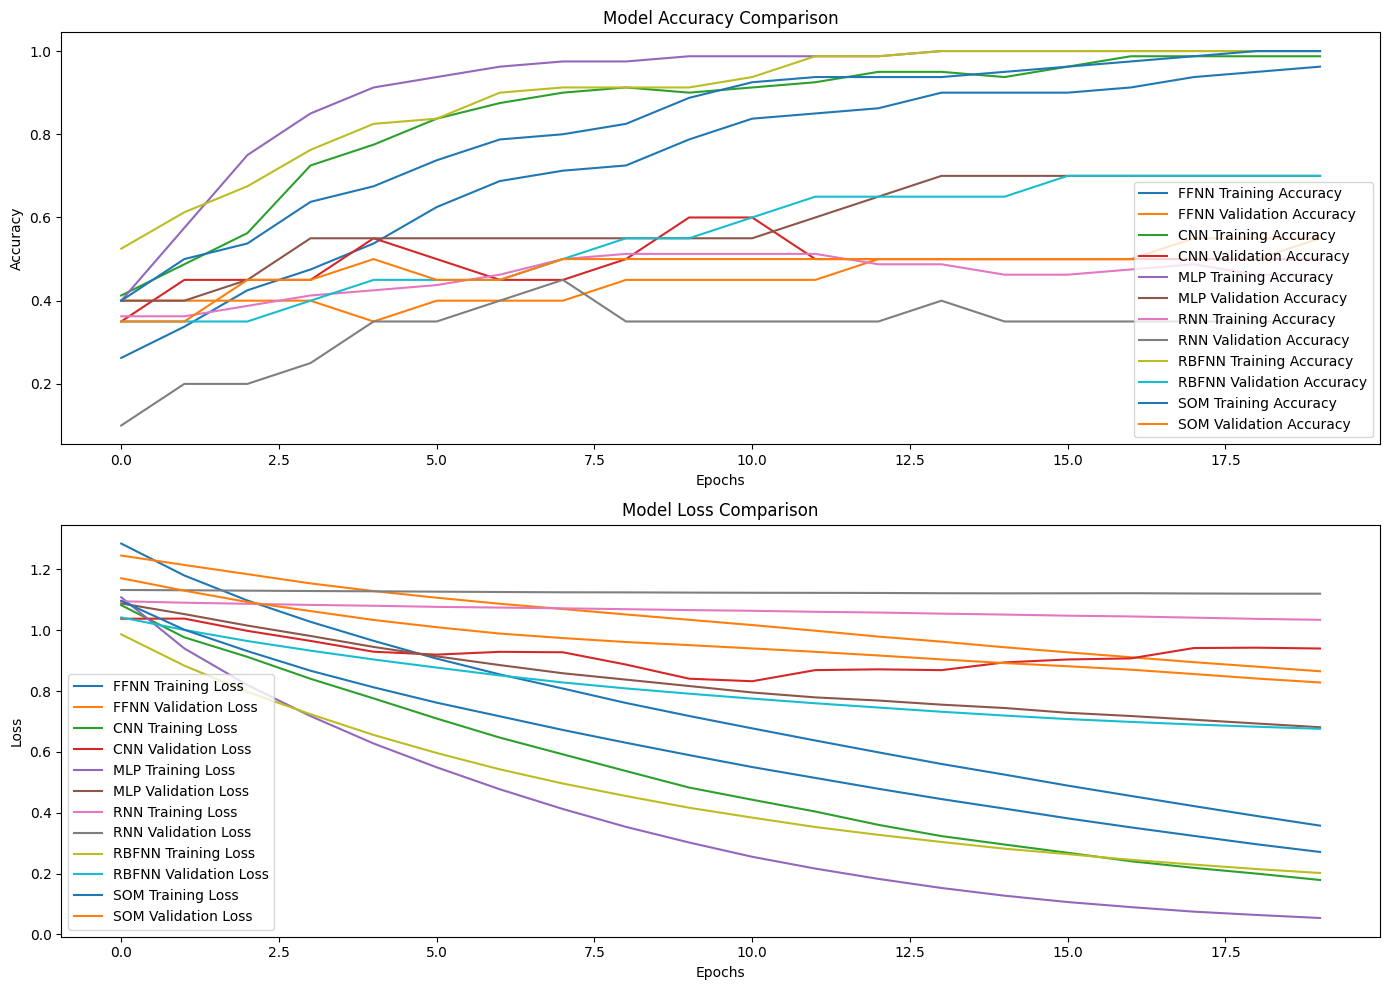

The best model is: MLP with an accuracy of 70.00%


In [ ]:
# Extract updated features and labels after clustering
# Extract features and labels
X = df_copy.drop('kmeans_labels', axis=1).values  # Features
y = df_copy['kmeans_labels'].values  # Cluster labels (0, 1, 2)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Convert labels to categorical (for multi-class classification)
y = to_categorical(y, num_classes=3)  # 3 clusters (0, 1, 2)

# Reshape X for CNN and RNN inputs (adding a channel dimension)
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape the data to add a "channel" dimension for CNN input, where each feature array now has a shape (number of samples, number of features, 1).
X_rnn = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets for the FFNN model, with 80% for training and 20% for testing.
X_train_cnn, X_test_cnn = train_test_split(X_cnn, test_size=0.2, random_state=42) # Split the reshaped data (for CNN) into training and testing sets.
X_train_rnn, X_test_rnn = train_test_split(X_rnn, test_size=0.2, random_state=42)

# Define the Feed Forward Neural Network (FFNN) model
def build_ffnn():  # Function to build a basic Feed Forward Neural Network (FFNN).
    model = Sequential()  # Initialize a sequential model (a linear stack of layers).
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Add a dense layer with 64 neurons, ReLU activation, and input shape matching the number of features.
    model.add(Dense(32, activation='relu'))  # Add another dense layer with 32 neurons and ReLU activation.
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons (one for each cluster) and softmax activation for multi-class classification.
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric.
    return model  # Return the model.

# Define the Convolutional Neural Network (CNN) model
def build_cnn():  # Function to build a basic Convolutional Neural Network (CNN).
    model = Sequential()  # Initialize a sequential model.
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))  # Add a 1D convolutional layer with 32 filters, a kernel size of 2, ReLU activation, and input shape suitable for CNN.
    model.add(MaxPooling1D(pool_size=2))  # Add a max pooling layer to reduce the spatial dimensions by taking the maximum value in each 2-pool window.
    model.add(Flatten())  # Flatten the output from previous layers into a 1D vector.
    model.add(Dense(32, activation='relu'))  # Add a dense layer with 32 neurons and ReLU activation.
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for multi-class classification (one neuron per cluster).
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric.
    return model  # Return the model.

# Define the Multi-Layer Perceptron (MLP) model
def build_mlp():  # Function to build a basic Multi-Layer Perceptron (MLP) model.
    model = Sequential()  # Initialize a sequential model.
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))  # Add a dense layer with 128 neurons, ReLU activation, and input shape matching the number of features.
    model.add(Dense(64, activation='relu'))  # Add another dense layer with 64 neurons and ReLU activation.
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for multi-class classification (one neuron per cluster).
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric.
    return model  # Return the model.

# Define the Recurrent Neural Network (RNN) model (using LSTM)
def build_rnn():  # Function to build a basic Recurrent Neural Network (RNN) model using LSTM layers.
    model = Sequential()  # Initialize a sequential model.
    model.add(LSTM(32, input_shape=(X_train_rnn.shape[1], 1), return_sequences=False))  # Add an LSTM layer with 32 units, configured for sequence processing, with input shape suitable for RNN.
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for multi-class classification (one neuron per cluster).
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric.
    return model  # Return the model.

# Define the Radial Basis Function Neural Network (RBFNN) model
# Approximation using Dense layers with tanh activation
def build_rbfnn():  # Function to build an approximate Radial Basis Function Neural Network (RBFNN) model.
    model = Sequential()  # Initialize a sequential model.
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='tanh'))  # Add a dense layer with 64 neurons and tanh activation (to approximate RBF behavior).
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for multi-class classification (one neuron per cluster).
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric.
    return model  # Return the model.

# Define the Self-Organizing Maps (SOM) model
# Approximated using Dense layers
def build_som():  # Function to build an approximate Self-Organizing Maps (SOM) model.
    model = Sequential()  # Initialize a sequential model.
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Add a dense layer with 64 neurons and ReLU activation (approximating SOM behavior).
    model.add(Dense(32, activation='relu'))  # Add another dense layer with 32 neurons and ReLU activation.
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for multi-class classification (one neuron per cluster).
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric.
    return model  # Return the model.

# Train the models and collect results
models = {  # Create a dictionary to store different models.
    'FFNN': build_ffnn(),  # Build and store the Feed Forward Neural Network (FFNN) model.
    'CNN': build_cnn(),  # Build and store the Convolutional Neural Network (CNN) model.
    'MLP': build_mlp(),  # Build and store the Multi-Layer Perceptron (MLP) model.
    'RNN': build_rnn(),  # Build and store the Recurrent Neural Network (RNN) model.
    'RBFNN': build_rbfnn(),  # Build and store the Radial Basis Function Neural Network (RBFNN) model.
    'SOM': build_som(),  # Build and store the Self-Organizing Maps (SOM) model.
}

histories = {}  # Initialize a dictionary to store training history for each model.
for name, model in models.items():  # Loop through each model in the dictionary.
    print(f"Training {name}...")  # Print the name of the model being trained.
    history = model.fit(  # Train the model and store the training history.
        X_train if name not in ['CNN', 'RNN'] else (X_train_cnn if name == 'CNN' else X_train_rnn),  # Select the correct training data format based on the model type.
        y_train,  # Use the same labels for training regardless of the model.
        epochs=20,  # Train for 20 epochs (20 iterations over the entire training dataset).
        batch_size=32,  # Use a batch size of 32 (process 32 samples at a time).
        validation_data=(  # Provide validation data to monitor performance during training.
            X_test if name not in ['CNN', 'RNN'] else (X_test_cnn if name == 'CNN' else X_test_rnn),  # Select the correct validation data format based on the model type.
            y_test),  # Use the same labels for validation regardless of the model.
        verbose=1)  # Print detailed training progress.
    histories[name] = history  # Store the training history for the current model.

# Evaluate and compare the models
results = {}
for name, model in models.items():
    loss, accuracy = model.evaluate(X_test if name not in ['CNN', 'RNN'] else (X_test_cnn if name == 'CNN' else X_test_rnn), y_test)
    results[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy * 100:.2f}%")

# Plotting the comparison of accuracy and loss
plt.figure(figsize=(14, 10))

# Accuracy comparison
plt.subplot(2, 1, 1)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(2, 1, 2)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Determine the best model based on accuracy
best_model = max(results, key=results.get)
print(f"The best model is: {best_model} with an accuracy of {results[best_model] * 100:.2f}%")

In [ ]:
# # Example new individual's encoded feature array
# new_individual = np.array([[0.5, -0.2, 0.3, 1.1, ...]])  # Replace with actual feature values

# # Normalize and reshape the new data
# new_individual = scaler.transform(new_individual)
# new_individual = new_individual.reshape(new_individual.shape[0], new_individual.shape[1], 1)

# # Predict the cluster
# predicted_cluster = np.argmax(model.predict(new_individual), axis=1)
# print(f'The new individual belongs to cluster: {predicted_cluster[0]}')

##Data Preparation

Dataset is already clustered into 3 groups (0, 1, 2). The first step is to preprocess and reshape the data for the CNN.

In [ ]:

# Assuming you have your dataset in a DataFrame 'df' where 'Cluster' is the target and the rest are features

# Extract features and labels
X = df_copy.drop('kmeans_labels', axis=1).values  # Features
y = df_copy['kmeans_labels'].values  # Cluster labels (0, 1, 2)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for CNN input (adding a channel dimension)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Convert labels to categorical (for multi-class classification)
y = to_categorical(y, num_classes=3)  # 3 clusters (0, 1, 2)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Designing the CNN Model

Now, define the CNN model. Even though CNNs are primarily designed for image data, they can be adapted to handle feature arrays for clustering prediction.

In [ ]:
# Define the CNN model
model = Sequential()

# Add a 1D Convolutional layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Add another 1D Convolutional layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(Dense(3, activation='softmax'))  # 3 clusters (0, 1, 2)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model

You can now train the model using the training data.

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.2844 - loss: 1.1087 - val_accuracy: 0.4000 - val_loss: 1.0912
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4070 - loss: 1.0816 - val_accuracy: 0.4000 - val_loss: 1.0850
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4359 - loss: 1.0740 - val_accuracy: 0.4500 - val_loss: 1.0786
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3961 - loss: 1.0757 - val_accuracy: 0.6000 - val_loss: 1.0639
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5930 - loss: 1.0262 - val_accuracy: 0.6000 - val_loss: 1.0618
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5422 - loss: 1.0165 - val_accuracy: 0.6000 - val_loss: 1.0534
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6305 - loss: 0.9922 - val_accuracy: 0.6500 - val_loss: 1.0476
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6641 - loss: 0.9717 - val_accuracy: 0.6000 - val_loss: 1.0362

## Evaluating the Model

Evaluate the model’s performance on the test data.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6500 - loss: 0.9370
Test Accuracy: 65.00%
